In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

### Загружаем датафрейм 

In [33]:
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

### 2.1 .head()

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 2.2 describe() 

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.3 считайте значение конкретной ячейки (с конкретным индексом из конкретной колонки) 

In [8]:
#позиция ячейки:
x, y = 0, 0 

iris.iloc[x, y]

5.1

### 2.4 фильтрация строк по диапазону индекса 

In [9]:
min_index = 10
max_index = 20

iris.loc[np.logical_and(iris.index >= min_index, iris.index <= max_index)]

,sepal_length,sepal_width,petal_length,petal_width,species
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa
12,4.8,3.0,1.4,0.1,setosa
13,4.3,3.0,1.1,0.1,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa


### 2.5 фильтрация набора данных по какому-либо условию 

In [10]:
condition_value = 5.0
iris.loc[iris.sepal_length > condition_value]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.6 работа с пропущенными значениями (если они есть): удаление строк с пропущенными значениями, заполнение пропущенных значений средним значением по колонке. Если пропущенных значений нет — намеренно их "генерируете", прибивая какие-то куски данных в np.nan 

In [11]:
# значения отсутствуют
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
# "генерируем" 
iris_with_null = iris

#первые 100 строк получают в sepal_length – nan
iris_with_null.loc[:100, "sepal_length"] = np.nan
iris_with_null.isnull().sum()

sepal_length    101
sepal_width       0
petal_length      0
petal_width       0
species           0
dtype: int64

In [13]:
#удаление с помощью dropna()
iris_with_null.dropna().isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
# "генерируем" 
iris_with_null = iris.copy()

#первые 100 строк получают в sepal_length – nan
iris_with_null.loc[:100, "sepal_length"] = np.nan
iris_with_null.isnull().sum()

sepal_length    101
sepal_width       0
petal_length      0
petal_width       0
species           0
dtype: int64

In [15]:
iris_with_null.sepal_length = iris_with_null.sepal_length.fillna(iris_with_null["sepal_length"].mean())
iris_with_null

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.593878,3.5,1.4,0.2,setosa
1,6.593878,3.0,1.4,0.2,setosa
2,6.593878,3.2,1.3,0.2,setosa
3,6.593878,3.1,1.5,0.2,setosa
4,6.593878,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.700000,3.0,5.2,2.3,virginica
146,6.300000,2.5,5.0,1.9,virginica
147,6.500000,3.0,5.2,2.0,virginica
148,6.200000,3.4,5.4,2.3,virginica


### 2.7 создание нового поля вычисленного на основе значений других полей:

### 2.8 через выражение на базе имеющихся колонок 

In [16]:
iris["sepal_square"] = iris["sepal_length"] * iris["sepal_width"]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_square
0,NaN,3.5,1.4,0.2,setosa,NaN
1,NaN,3.0,1.4,0.2,setosa,NaN
2,NaN,3.2,1.3,0.2,setosa,NaN
3,NaN,3.1,1.5,0.2,setosa,NaN
4,NaN,3.6,1.4,0.2,setosa,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10
146,6.3,2.5,5.0,1.9,virginica,15.75
147,6.5,3.0,5.2,2.0,virginica,19.50
148,6.2,3.4,5.4,2.3,virginica,21.08


In [17]:
iris = iris.drop(["sepal_square"], axis=1)

### 2.9 через DataFrame.apply 

In [18]:
iris_sepal = iris[["sepal_length", "sepal_width"]]

iris["sepal_square"] = iris_sepal.apply(lambda x: x["sepal_length"] * x["sepal_width"], axis=1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_square
0,NaN,3.5,1.4,0.2,setosa,NaN
1,NaN,3.0,1.4,0.2,setosa,NaN
2,NaN,3.2,1.3,0.2,setosa,NaN
3,NaN,3.1,1.5,0.2,setosa,NaN
4,NaN,3.6,1.4,0.2,setosa,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,20.10
146,6.3,2.5,5.0,1.9,virginica,15.75
147,6.5,3.0,5.2,2.0,virginica,19.50
148,6.2,3.4,5.4,2.3,virginica,21.08


In [19]:
iris = iris.drop(["sepal_square"], axis=1)

### 2.10 через Series.apply 

In [20]:
sl_series = iris.sepal_length
iris["sepal_length_after_year"] = sl_series.apply(lambda x: x+1.0)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_after_year
0,NaN,3.5,1.4,0.2,setosa,NaN
1,NaN,3.0,1.4,0.2,setosa,NaN
2,NaN,3.2,1.3,0.2,setosa,NaN
3,NaN,3.1,1.5,0.2,setosa,NaN
4,NaN,3.6,1.4,0.2,setosa,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,7.7
146,6.3,2.5,5.0,1.9,virginica,7.3
147,6.5,3.0,5.2,2.0,virginica,7.5
148,6.2,3.4,5.4,2.3,virginica,7.2


In [21]:
iris = iris.drop(["sepal_length_after_year"], axis=1)

### 2.11 сортировка по какому-либо из полей 

In [22]:
iris.sort_values(by='sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,species
106,4.9,2.5,4.5,1.7,virginica
121,5.6,2.8,4.9,2.0,virginica
113,5.7,2.5,5.0,2.0,virginica
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica
...,...,...,...,...,...
96,NaN,2.9,4.2,1.3,versicolor
97,NaN,2.9,4.3,1.3,versicolor
98,NaN,2.5,3.0,1.1,versicolor
99,NaN,2.8,4.1,1.3,versicolor


### 2.12 вычислить несколько статистик по колонкам (используйте встроенные агрегатные функции — любые на выбор) 10. По какому-либо полю / набору полей смотрим число значений с помощью .value_counts() 

In [23]:
iris.agg({'sepal_length' : ['sum', 'min', 'max'], 
          'sepal_width' : ['sum', 'min', 'max'], 
          'petal_length': ['sum', 'min', 'max'],
          'petal_width': ['sum', 'min', 'max']})

,sepal_length,sepal_width,petal_length,petal_width
sum,323.1,458.6,563.7,179.9
min,4.9,2.0,1.0,0.1
max,7.9,4.4,6.9,2.5


### 2.13 Если значений немного — вывод уникальных значений какой-либо колонки через .unique()

In [24]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### 2.14 Удалите текущий индекс и создайте новый индекс на базе новой колонки, которая для этого лучше всего подходит

In [25]:
iris.set_index(['species'])

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,NaN,3.5,1.4,0.2
setosa,NaN,3.0,1.4,0.2
setosa,NaN,3.2,1.3,0.2
setosa,NaN,3.1,1.5,0.2
setosa,NaN,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


### 3. Продемонстрировать работу .groupby, на основе группировок в groupby вычисляете агрегатные функции по одной или нескольким колонкам

In [26]:
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,NaN,3.428,1.462,0.246
versicolor,NaN,2.770,4.260,1.326
virginica,6.593878,2.974,5.552,2.026


In [34]:
iris.groupby(['species']).max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [35]:
iris.groupby(['species']).min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [29]:
iris.groupby(['sepal_length']).mean()

,sepal_width,petal_length,petal_width
sepal_length,,,
4.9,2.500000,4.500000,1.700000
5.6,2.800000,4.900000,2.000000
5.7,2.500000,5.000000,2.000000
5.8,2.733333,5.100000,2.066667
5.9,3.000000,5.100000,1.800000
6.0,2.600000,4.900000,1.650000
6.1,2.800000,5.250000,1.600000
6.2,3.100000,5.100000,2.050000
6.3,2.860000,5.240000,1.880000


### 4 Решейпинг данных 1Dto2D с помощью .pivot (можно подать на вход результаты агрегатов, полученных ранее через .groupby (сгруппировать по двум полям), либо прекрасно заходит сюда данные из SQL сгруппированные предварительно по 2-м полям)

In [30]:
iris.pivot(columns='species', values=['sepal_length','sepal_width'])

sepal_length                      sepal_width                     
species       setosa versicolor virginica      setosa versicolor virginica
0                NaN        NaN       NaN         3.5        NaN       NaN
1                NaN        NaN       NaN         3.0        NaN       NaN
2                NaN        NaN       NaN         3.2        NaN       NaN
3                NaN        NaN       NaN         3.1        NaN       NaN
4                NaN        NaN       NaN         3.6        NaN       NaN
..               ...        ...       ...         ...        ...       ...
145              NaN        NaN       6.7         NaN        NaN       3.0
146              NaN        NaN       6.3         NaN        NaN       2.5
147              NaN        NaN       6.5         NaN        NaN       3.0
148              NaN        NaN       6.2         NaN        NaN       3.4
149              NaN        NaN       5.9         NaN        NaN       3.0

[150 rows x 6 columns]

### 5 Решейпинг 1Dto2D данных соединённый с группировкой / агрегацией (одним словом — сводная таблица): .pivot_table. Группируем только по категориальным полям или числовым, если уверены, что значений немного! Если значений много, можете вначале из загрубить (см. (2.7.) либо (7)) 

In [36]:
iris.pivot_table(columns='species', values=['sepal_length','sepal_width'], aggfunc=['max', 'mean', 'min'])

max                        mean                         min  \
species      setosa versicolor virginica setosa versicolor virginica setosa   
sepal_length    5.8        7.0       7.9  5.006      5.936     6.588    4.3   
sepal_width     4.4        3.4       3.8  3.428      2.770     2.974    2.3   

                                   
species      versicolor virginica  
sepal_length        4.9       4.9  
sepal_width         2.0       2.2

### 6 Посчитать квантили распределения какого-либо вещественного признака (с помощью numpy.quantile или numpy.percentile) 

In [32]:
iris.quantile(.5)

sepal_length    6.50
sepal_width     3.00
petal_length    4.35
petal_width     1.30
Name: 0.5, dtype: float64

In [100]:
#тоже самое, но как я понял ручками надо каждую серию подставлять:
np.quantile(iris.sepal_length, 0.5)

5.8

### 7 Посчитать (в виде текста) гистограмму какого-либо вещественного признака (с помощью numpy.histogram). Значения гистограммы можете использовать как вариант в качестве загрубленного числового признака для заданий (4) или (5).

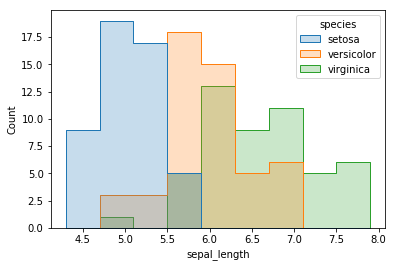

In [38]:
sns.histplot(iris, x="sepal_length", hue="species", element="step")

### 8 Получить DataFrame с MultiIndex любым способом: через конструктор (в документации увидите множество видов конструкторов для создания MultiIndex с нуля), через read_sql / read_csv / read_excel, read_*, через pivot_table, через groupby или иными способами. 

In [47]:
multi = iris.set_index(['species', 'petal_width', 'petal_length', 'sepal_length', 'sepal_width'])
multi

Empty DataFrame
Columns: []
Index: [(setosa, 0.2, 1.4, 5.1, 3.5), (setosa, 0.2, 1.4, 4.9, 3.0), (setosa, 0.2, 1.3, 4.7, 3.2), (setosa, 0.2, 1.5, 4.6, 3.1), (setosa, 0.2, 1.4, 5.0, 3.6), (setosa, 0.4, 1.7, 5.4, 3.9), (setosa, 0.3, 1.4, 4.6, 3.4), (setosa, 0.2, 1.5, 5.0, 3.4), (setosa, 0.2, 1.4, 4.4, 2.9), (setosa, 0.1, 1.5, 4.9, 3.1), (setosa, 0.2, 1.5, 5.4, 3.7), (setosa, 0.2, 1.6, 4.8, 3.4), (setosa, 0.1, 1.4, 4.8, 3.0), (setosa, 0.1, 1.1, 4.3, 3.0), (setosa, 0.2, 1.2, 5.8, 4.0), (setosa, 0.4, 1.5, 5.7, 4.4), (setosa, 0.4, 1.3, 5.4, 3.9), (setosa, 0.3, 1.4, 5.1, 3.5), (setosa, 0.3, 1.7, 5.7, 3.8), (setosa, 0.3, 1.5, 5.1, 3.8), (setosa, 0.2, 1.7, 5.4, 3.4), (setosa, 0.4, 1.5, 5.1, 3.7), (setosa, 0.2, 1.0, 4.6, 3.6), (setosa, 0.5, 1.7, 5.1, 3.3), (setosa, 0.2, 1.9, 4.8, 3.4), (setosa, 0.2, 1.6, 5.0, 3.0), (setosa, 0.4, 1.6, 5.0, 3.4), (setosa, 0.2, 1.5, 5.2, 3.5), (setosa, 0.2, 1.4, 5.2, 3.4), (setosa, 0.2, 1.6, 4.7, 3.2), (setosa, 0.2, 1.6, 4.8, 3.1), (setosa, 0.4, 1.5, 5.4, 3.4), (setosa, 0.1, 1.5, 5.2, 4.1), (setosa, 0.2, 1.4, 5.5, 4.2), (setosa, 0.2, 1.5, 4.9, 3.1), (setosa, 0.2, 1.2, 5.0, 3.2), (setosa, 0.2, 1.3, 5.5, 3.5), (setosa, 0.1, 1.4, 4.9, 3.6), (setosa, 0.2, 1.3, 4.4, 3.0), (setosa, 0.2, 1.5, 5.1, 3.4), (setosa, 0.3, 1.3, 5.0, 3.5), (setosa, 0.3, 1.3, 4.5, 2.3), (setosa, 0.2, 1.3, 4.4, 3.2), (setosa, 0.6, 1.6, 5.0, 3.5), (setosa, 0.4, 1.9, 5.1, 3.8), (setosa, 0.3, 1.4, 4.8, 3.0), (setosa, 0.2, 1.6, 5.1, 3.8), (setosa, 0.2, 1.4, 4.6, 3.2), (setosa, 0.2, 1.5, 5.3, 3.7), (setosa, 0.2, 1.4, 5.0, 3.3), (versicolor, 1.4, 4.7, 7.0, 3.2), (versicolor, 1.5, 4.5, 6.4, 3.2), (versicolor, 1.5, 4.9, 6.9, 3.1), (versicolor, 1.3, 4.0, 5.5, 2.3), (versicolor, 1.5, 4.6, 6.5, 2.8), (versicolor, 1.3, 4.5, 5.7, 2.8), (versicolor, 1.6, 4.7, 6.3, 3.3), (versicolor, 1.0, 3.3, 4.9, 2.4), (versicolor, 1.3, 4.6, 6.6, 2.9), (versicolor, 1.4, 3.9, 5.2, 2.7), (versicolor, 1.0, 3.5, 5.0, 2.0), (versicolor, 1.5, 4.2, 5.9, 3.0), (versicolor, 1.0, 4.0, 6.0, 2.2), (versicolor, 1.4, 4.7, 6.1, 2.9), (versicolor, 1.3, 3.6, 5.6, 2.9), (versicolor, 1.4, 4.4, 6.7, 3.1), (versicolor, 1.5, 4.5, 5.6, 3.0), (versicolor, 1.0, 4.1, 5.8, 2.7), (versicolor, 1.5, 4.5, 6.2, 2.2), (versicolor, 1.1, 3.9, 5.6, 2.5), (versicolor, 1.8, 4.8, 5.9, 3.2), (versicolor, 1.3, 4.0, 6.1, 2.8), (versicolor, 1.5, 4.9, 6.3, 2.5), (versicolor, 1.2, 4.7, 6.1, 2.8), (versicolor, 1.3, 4.3, 6.4, 2.9), (versicolor, 1.4, 4.4, 6.6, 3.0), (versicolor, 1.4, 4.8, 6.8, 2.8), (versicolor, 1.7, 5.0, 6.7, 3.0), (versicolor, 1.5, 4.5, 6.0, 2.9), (versicolor, 1.0, 3.5, 5.7, 2.6), (versicolor, 1.1, 3.8, 5.5, 2.4), (versicolor, 1.0, 3.7, 5.5, 2.4), (versicolor, 1.2, 3.9, 5.8, 2.7), (versicolor, 1.6, 5.1, 6.0, 2.7), (versicolor, 1.5, 4.5, 5.4, 3.0), (versicolor, 1.6, 4.5, 6.0, 3.4), (versicolor, 1.5, 4.7, 6.7, 3.1), (versicolor, 1.3, 4.4, 6.3, 2.3), (versicolor, 1.3, 4.1, 5.6, 3.0), (versicolor, 1.3, 4.0, 5.5, 2.5), (versicolor, 1.2, 4.4, 5.5, 2.6), (versicolor, 1.4, 4.6, 6.1, 3.0), (versicolor, 1.2, 4.0, 5.8, 2.6), (versicolor, 1.0, 3.3, 5.0, 2.3), (versicolor, 1.3, 4.2, 5.6, 2.7), (versicolor, 1.2, 4.2, 5.7, 3.0), (versicolor, 1.3, 4.2, 5.7, 2.9), (versicolor, 1.3, 4.3, 6.2, 2.9), (versicolor, 1.1, 3.0, 5.1, 2.5), (versicolor, 1.3, 4.1, 5.7, 2.8), ...]

[150 rows x 0 columns]

### 8.1 Переставить местами уровни индекса 

In [49]:
multi.swaplevel(1,2)

Empty DataFrame
Columns: []
Index: [(setosa, 1.4, 0.2, 5.1, 3.5), (setosa, 1.4, 0.2, 4.9, 3.0), (setosa, 1.3, 0.2, 4.7, 3.2), (setosa, 1.5, 0.2, 4.6, 3.1), (setosa, 1.4, 0.2, 5.0, 3.6), (setosa, 1.7, 0.4, 5.4, 3.9), (setosa, 1.4, 0.3, 4.6, 3.4), (setosa, 1.5, 0.2, 5.0, 3.4), (setosa, 1.4, 0.2, 4.4, 2.9), (setosa, 1.5, 0.1, 4.9, 3.1), (setosa, 1.5, 0.2, 5.4, 3.7), (setosa, 1.6, 0.2, 4.8, 3.4), (setosa, 1.4, 0.1, 4.8, 3.0), (setosa, 1.1, 0.1, 4.3, 3.0), (setosa, 1.2, 0.2, 5.8, 4.0), (setosa, 1.5, 0.4, 5.7, 4.4), (setosa, 1.3, 0.4, 5.4, 3.9), (setosa, 1.4, 0.3, 5.1, 3.5), (setosa, 1.7, 0.3, 5.7, 3.8), (setosa, 1.5, 0.3, 5.1, 3.8), (setosa, 1.7, 0.2, 5.4, 3.4), (setosa, 1.5, 0.4, 5.1, 3.7), (setosa, 1.0, 0.2, 4.6, 3.6), (setosa, 1.7, 0.5, 5.1, 3.3), (setosa, 1.9, 0.2, 4.8, 3.4), (setosa, 1.6, 0.2, 5.0, 3.0), (setosa, 1.6, 0.4, 5.0, 3.4), (setosa, 1.5, 0.2, 5.2, 3.5), (setosa, 1.4, 0.2, 5.2, 3.4), (setosa, 1.6, 0.2, 4.7, 3.2), (setosa, 1.6, 0.2, 4.8, 3.1), (setosa, 1.5, 0.4, 5.4, 3.4), (setosa, 1.5, 0.1, 5.2, 4.1), (setosa, 1.4, 0.2, 5.5, 4.2), (setosa, 1.5, 0.2, 4.9, 3.1), (setosa, 1.2, 0.2, 5.0, 3.2), (setosa, 1.3, 0.2, 5.5, 3.5), (setosa, 1.4, 0.1, 4.9, 3.6), (setosa, 1.3, 0.2, 4.4, 3.0), (setosa, 1.5, 0.2, 5.1, 3.4), (setosa, 1.3, 0.3, 5.0, 3.5), (setosa, 1.3, 0.3, 4.5, 2.3), (setosa, 1.3, 0.2, 4.4, 3.2), (setosa, 1.6, 0.6, 5.0, 3.5), (setosa, 1.9, 0.4, 5.1, 3.8), (setosa, 1.4, 0.3, 4.8, 3.0), (setosa, 1.6, 0.2, 5.1, 3.8), (setosa, 1.4, 0.2, 4.6, 3.2), (setosa, 1.5, 0.2, 5.3, 3.7), (setosa, 1.4, 0.2, 5.0, 3.3), (versicolor, 4.7, 1.4, 7.0, 3.2), (versicolor, 4.5, 1.5, 6.4, 3.2), (versicolor, 4.9, 1.5, 6.9, 3.1), (versicolor, 4.0, 1.3, 5.5, 2.3), (versicolor, 4.6, 1.5, 6.5, 2.8), (versicolor, 4.5, 1.3, 5.7, 2.8), (versicolor, 4.7, 1.6, 6.3, 3.3), (versicolor, 3.3, 1.0, 4.9, 2.4), (versicolor, 4.6, 1.3, 6.6, 2.9), (versicolor, 3.9, 1.4, 5.2, 2.7), (versicolor, 3.5, 1.0, 5.0, 2.0), (versicolor, 4.2, 1.5, 5.9, 3.0), (versicolor, 4.0, 1.0, 6.0, 2.2), (versicolor, 4.7, 1.4, 6.1, 2.9), (versicolor, 3.6, 1.3, 5.6, 2.9), (versicolor, 4.4, 1.4, 6.7, 3.1), (versicolor, 4.5, 1.5, 5.6, 3.0), (versicolor, 4.1, 1.0, 5.8, 2.7), (versicolor, 4.5, 1.5, 6.2, 2.2), (versicolor, 3.9, 1.1, 5.6, 2.5), (versicolor, 4.8, 1.8, 5.9, 3.2), (versicolor, 4.0, 1.3, 6.1, 2.8), (versicolor, 4.9, 1.5, 6.3, 2.5), (versicolor, 4.7, 1.2, 6.1, 2.8), (versicolor, 4.3, 1.3, 6.4, 2.9), (versicolor, 4.4, 1.4, 6.6, 3.0), (versicolor, 4.8, 1.4, 6.8, 2.8), (versicolor, 5.0, 1.7, 6.7, 3.0), (versicolor, 4.5, 1.5, 6.0, 2.9), (versicolor, 3.5, 1.0, 5.7, 2.6), (versicolor, 3.8, 1.1, 5.5, 2.4), (versicolor, 3.7, 1.0, 5.5, 2.4), (versicolor, 3.9, 1.2, 5.8, 2.7), (versicolor, 5.1, 1.6, 6.0, 2.7), (versicolor, 4.5, 1.5, 5.4, 3.0), (versicolor, 4.5, 1.6, 6.0, 3.4), (versicolor, 4.7, 1.5, 6.7, 3.1), (versicolor, 4.4, 1.3, 6.3, 2.3), (versicolor, 4.1, 1.3, 5.6, 3.0), (versicolor, 4.0, 1.3, 5.5, 2.5), (versicolor, 4.4, 1.2, 5.5, 2.6), (versicolor, 4.6, 1.4, 6.1, 3.0), (versicolor, 4.0, 1.2, 5.8, 2.6), (versicolor, 3.3, 1.0, 5.0, 2.3), (versicolor, 4.2, 1.3, 5.6, 2.7), (versicolor, 4.2, 1.2, 5.7, 3.0), (versicolor, 4.2, 1.3, 5.7, 2.9), (versicolor, 4.3, 1.3, 6.2, 2.9), (versicolor, 3.0, 1.1, 5.1, 2.5), (versicolor, 4.1, 1.3, 5.7, 2.8), ...]

[150 rows x 0 columns]

In [50]:
# тоже самое только string:
multi.swaplevel("petal_length", "petal_width")

Empty DataFrame
Columns: []
Index: [(setosa, 1.4, 0.2, 5.1, 3.5), (setosa, 1.4, 0.2, 4.9, 3.0), (setosa, 1.3, 0.2, 4.7, 3.2), (setosa, 1.5, 0.2, 4.6, 3.1), (setosa, 1.4, 0.2, 5.0, 3.6), (setosa, 1.7, 0.4, 5.4, 3.9), (setosa, 1.4, 0.3, 4.6, 3.4), (setosa, 1.5, 0.2, 5.0, 3.4), (setosa, 1.4, 0.2, 4.4, 2.9), (setosa, 1.5, 0.1, 4.9, 3.1), (setosa, 1.5, 0.2, 5.4, 3.7), (setosa, 1.6, 0.2, 4.8, 3.4), (setosa, 1.4, 0.1, 4.8, 3.0), (setosa, 1.1, 0.1, 4.3, 3.0), (setosa, 1.2, 0.2, 5.8, 4.0), (setosa, 1.5, 0.4, 5.7, 4.4), (setosa, 1.3, 0.4, 5.4, 3.9), (setosa, 1.4, 0.3, 5.1, 3.5), (setosa, 1.7, 0.3, 5.7, 3.8), (setosa, 1.5, 0.3, 5.1, 3.8), (setosa, 1.7, 0.2, 5.4, 3.4), (setosa, 1.5, 0.4, 5.1, 3.7), (setosa, 1.0, 0.2, 4.6, 3.6), (setosa, 1.7, 0.5, 5.1, 3.3), (setosa, 1.9, 0.2, 4.8, 3.4), (setosa, 1.6, 0.2, 5.0, 3.0), (setosa, 1.6, 0.4, 5.0, 3.4), (setosa, 1.5, 0.2, 5.2, 3.5), (setosa, 1.4, 0.2, 5.2, 3.4), (setosa, 1.6, 0.2, 4.7, 3.2), (setosa, 1.6, 0.2, 4.8, 3.1), (setosa, 1.5, 0.4, 5.4, 3.4), (setosa, 1.5, 0.1, 5.2, 4.1), (setosa, 1.4, 0.2, 5.5, 4.2), (setosa, 1.5, 0.2, 4.9, 3.1), (setosa, 1.2, 0.2, 5.0, 3.2), (setosa, 1.3, 0.2, 5.5, 3.5), (setosa, 1.4, 0.1, 4.9, 3.6), (setosa, 1.3, 0.2, 4.4, 3.0), (setosa, 1.5, 0.2, 5.1, 3.4), (setosa, 1.3, 0.3, 5.0, 3.5), (setosa, 1.3, 0.3, 4.5, 2.3), (setosa, 1.3, 0.2, 4.4, 3.2), (setosa, 1.6, 0.6, 5.0, 3.5), (setosa, 1.9, 0.4, 5.1, 3.8), (setosa, 1.4, 0.3, 4.8, 3.0), (setosa, 1.6, 0.2, 5.1, 3.8), (setosa, 1.4, 0.2, 4.6, 3.2), (setosa, 1.5, 0.2, 5.3, 3.7), (setosa, 1.4, 0.2, 5.0, 3.3), (versicolor, 4.7, 1.4, 7.0, 3.2), (versicolor, 4.5, 1.5, 6.4, 3.2), (versicolor, 4.9, 1.5, 6.9, 3.1), (versicolor, 4.0, 1.3, 5.5, 2.3), (versicolor, 4.6, 1.5, 6.5, 2.8), (versicolor, 4.5, 1.3, 5.7, 2.8), (versicolor, 4.7, 1.6, 6.3, 3.3), (versicolor, 3.3, 1.0, 4.9, 2.4), (versicolor, 4.6, 1.3, 6.6, 2.9), (versicolor, 3.9, 1.4, 5.2, 2.7), (versicolor, 3.5, 1.0, 5.0, 2.0), (versicolor, 4.2, 1.5, 5.9, 3.0), (versicolor, 4.0, 1.0, 6.0, 2.2), (versicolor, 4.7, 1.4, 6.1, 2.9), (versicolor, 3.6, 1.3, 5.6, 2.9), (versicolor, 4.4, 1.4, 6.7, 3.1), (versicolor, 4.5, 1.5, 5.6, 3.0), (versicolor, 4.1, 1.0, 5.8, 2.7), (versicolor, 4.5, 1.5, 6.2, 2.2), (versicolor, 3.9, 1.1, 5.6, 2.5), (versicolor, 4.8, 1.8, 5.9, 3.2), (versicolor, 4.0, 1.3, 6.1, 2.8), (versicolor, 4.9, 1.5, 6.3, 2.5), (versicolor, 4.7, 1.2, 6.1, 2.8), (versicolor, 4.3, 1.3, 6.4, 2.9), (versicolor, 4.4, 1.4, 6.6, 3.0), (versicolor, 4.8, 1.4, 6.8, 2.8), (versicolor, 5.0, 1.7, 6.7, 3.0), (versicolor, 4.5, 1.5, 6.0, 2.9), (versicolor, 3.5, 1.0, 5.7, 2.6), (versicolor, 3.8, 1.1, 5.5, 2.4), (versicolor, 3.7, 1.0, 5.5, 2.4), (versicolor, 3.9, 1.2, 5.8, 2.7), (versicolor, 5.1, 1.6, 6.0, 2.7), (versicolor, 4.5, 1.5, 5.4, 3.0), (versicolor, 4.5, 1.6, 6.0, 3.4), (versicolor, 4.7, 1.5, 6.7, 3.1), (versicolor, 4.4, 1.3, 6.3, 2.3), (versicolor, 4.1, 1.3, 5.6, 3.0), (versicolor, 4.0, 1.3, 5.5, 2.5), (versicolor, 4.4, 1.2, 5.5, 2.6), (versicolor, 4.6, 1.4, 6.1, 3.0), (versicolor, 4.0, 1.2, 5.8, 2.6), (versicolor, 3.3, 1.0, 5.0, 2.3), (versicolor, 4.2, 1.3, 5.6, 2.7), (versicolor, 4.2, 1.2, 5.7, 3.0), (versicolor, 4.2, 1.3, 5.7, 2.9), (versicolor, 4.3, 1.3, 6.2, 2.9), (versicolor, 3.0, 1.1, 5.1, 2.5), (versicolor, 4.1, 1.3, 5.7, 2.8), ...]

[150 rows x 0 columns]

### 8.2 Транспонировать таблицу (или создать новую другую) с MultiIndex 

In [51]:
multi.T

Empty DataFrame
Columns: [(setosa, 0.2, 1.4, 5.1, 3.5), (setosa, 0.2, 1.4, 4.9, 3.0), (setosa, 0.2, 1.3, 4.7, 3.2), (setosa, 0.2, 1.5, 4.6, 3.1), (setosa, 0.2, 1.4, 5.0, 3.6), (setosa, 0.4, 1.7, 5.4, 3.9), (setosa, 0.3, 1.4, 4.6, 3.4), (setosa, 0.2, 1.5, 5.0, 3.4), (setosa, 0.2, 1.4, 4.4, 2.9), (setosa, 0.1, 1.5, 4.9, 3.1), (setosa, 0.2, 1.5, 5.4, 3.7), (setosa, 0.2, 1.6, 4.8, 3.4), (setosa, 0.1, 1.4, 4.8, 3.0), (setosa, 0.1, 1.1, 4.3, 3.0), (setosa, 0.2, 1.2, 5.8, 4.0), (setosa, 0.4, 1.5, 5.7, 4.4), (setosa, 0.4, 1.3, 5.4, 3.9), (setosa, 0.3, 1.4, 5.1, 3.5), (setosa, 0.3, 1.7, 5.7, 3.8), (setosa, 0.3, 1.5, 5.1, 3.8), (setosa, 0.2, 1.7, 5.4, 3.4), (setosa, 0.4, 1.5, 5.1, 3.7), (setosa, 0.2, 1.0, 4.6, 3.6), (setosa, 0.5, 1.7, 5.1, 3.3), (setosa, 0.2, 1.9, 4.8, 3.4), (setosa, 0.2, 1.6, 5.0, 3.0), (setosa, 0.4, 1.6, 5.0, 3.4), (setosa, 0.2, 1.5, 5.2, 3.5), (setosa, 0.2, 1.4, 5.2, 3.4), (setosa, 0.2, 1.6, 4.7, 3.2), (setosa, 0.2, 1.6, 4.8, 3.1), (setosa, 0.4, 1.5, 5.4, 3.4), (setosa, 0.1, 1.5, 5.2, 4.1), (setosa, 0.2, 1.4, 5.5, 4.2), (setosa, 0.2, 1.5, 4.9, 3.1), (setosa, 0.2, 1.2, 5.0, 3.2), (setosa, 0.2, 1.3, 5.5, 3.5), (setosa, 0.1, 1.4, 4.9, 3.6), (setosa, 0.2, 1.3, 4.4, 3.0), (setosa, 0.2, 1.5, 5.1, 3.4), (setosa, 0.3, 1.3, 5.0, 3.5), (setosa, 0.3, 1.3, 4.5, 2.3), (setosa, 0.2, 1.3, 4.4, 3.2), (setosa, 0.6, 1.6, 5.0, 3.5), (setosa, 0.4, 1.9, 5.1, 3.8), (setosa, 0.3, 1.4, 4.8, 3.0), (setosa, 0.2, 1.6, 5.1, 3.8), (setosa, 0.2, 1.4, 4.6, 3.2), (setosa, 0.2, 1.5, 5.3, 3.7), (setosa, 0.2, 1.4, 5.0, 3.3), (versicolor, 1.4, 4.7, 7.0, 3.2), (versicolor, 1.5, 4.5, 6.4, 3.2), (versicolor, 1.5, 4.9, 6.9, 3.1), (versicolor, 1.3, 4.0, 5.5, 2.3), (versicolor, 1.5, 4.6, 6.5, 2.8), (versicolor, 1.3, 4.5, 5.7, 2.8), (versicolor, 1.6, 4.7, 6.3, 3.3), (versicolor, 1.0, 3.3, 4.9, 2.4), (versicolor, 1.3, 4.6, 6.6, 2.9), (versicolor, 1.4, 3.9, 5.2, 2.7), (versicolor, 1.0, 3.5, 5.0, 2.0), (versicolor, 1.5, 4.2, 5.9, 3.0), (versicolor, 1.0, 4.0, 6.0, 2.2), (versicolor, 1.4, 4.7, 6.1, 2.9), (versicolor, 1.3, 3.6, 5.6, 2.9), (versicolor, 1.4, 4.4, 6.7, 3.1), (versicolor, 1.5, 4.5, 5.6, 3.0), (versicolor, 1.0, 4.1, 5.8, 2.7), (versicolor, 1.5, 4.5, 6.2, 2.2), (versicolor, 1.1, 3.9, 5.6, 2.5), (versicolor, 1.8, 4.8, 5.9, 3.2), (versicolor, 1.3, 4.0, 6.1, 2.8), (versicolor, 1.5, 4.9, 6.3, 2.5), (versicolor, 1.2, 4.7, 6.1, 2.8), (versicolor, 1.3, 4.3, 6.4, 2.9), (versicolor, 1.4, 4.4, 6.6, 3.0), (versicolor, 1.4, 4.8, 6.8, 2.8), (versicolor, 1.7, 5.0, 6.7, 3.0), (versicolor, 1.5, 4.5, 6.0, 2.9), (versicolor, 1.0, 3.5, 5.7, 2.6), (versicolor, 1.1, 3.8, 5.5, 2.4), (versicolor, 1.0, 3.7, 5.5, 2.4), (versicolor, 1.2, 3.9, 5.8, 2.7), (versicolor, 1.6, 5.1, 6.0, 2.7), (versicolor, 1.5, 4.5, 5.4, 3.0), (versicolor, 1.6, 4.5, 6.0, 3.4), (versicolor, 1.5, 4.7, 6.7, 3.1), (versicolor, 1.3, 4.4, 6.3, 2.3), (versicolor, 1.3, 4.1, 5.6, 3.0), (versicolor, 1.3, 4.0, 5.5, 2.5), (versicolor, 1.2, 4.4, 5.5, 2.6), (versicolor, 1.4, 4.6, 6.1, 3.0), (versicolor, 1.2, 4.0, 5.8, 2.6), (versicolor, 1.0, 3.3, 5.0, 2.3), (versicolor, 1.3, 4.2, 5.6, 2.7), (versicolor, 1.2, 4.2, 5.7, 3.0), (versicolor, 1.3, 4.2, 5.7, 2.9), (versicolor, 1.3, 4.3, 6.2, 2.9), (versicolor, 1.1, 3.0, 5.1, 2.5), (versicolor, 1.3, 4.1, 5.7, 2.8), ...]
Index: []

[0 rows x 150 columns]

### 8.3 Удалить один из уровней индекса или добавить новый уровень индекса (можно инициализированный константой) — посмотрите сами в документации как это делать 

In [52]:
multi.droplevel(3)

Empty DataFrame
Columns: []
Index: [(setosa, 0.2, 1.4, 3.5), (setosa, 0.2, 1.4, 3.0), (setosa, 0.2, 1.3, 3.2), (setosa, 0.2, 1.5, 3.1), (setosa, 0.2, 1.4, 3.6), (setosa, 0.4, 1.7, 3.9), (setosa, 0.3, 1.4, 3.4), (setosa, 0.2, 1.5, 3.4), (setosa, 0.2, 1.4, 2.9), (setosa, 0.1, 1.5, 3.1), (setosa, 0.2, 1.5, 3.7), (setosa, 0.2, 1.6, 3.4), (setosa, 0.1, 1.4, 3.0), (setosa, 0.1, 1.1, 3.0), (setosa, 0.2, 1.2, 4.0), (setosa, 0.4, 1.5, 4.4), (setosa, 0.4, 1.3, 3.9), (setosa, 0.3, 1.4, 3.5), (setosa, 0.3, 1.7, 3.8), (setosa, 0.3, 1.5, 3.8), (setosa, 0.2, 1.7, 3.4), (setosa, 0.4, 1.5, 3.7), (setosa, 0.2, 1.0, 3.6), (setosa, 0.5, 1.7, 3.3), (setosa, 0.2, 1.9, 3.4), (setosa, 0.2, 1.6, 3.0), (setosa, 0.4, 1.6, 3.4), (setosa, 0.2, 1.5, 3.5), (setosa, 0.2, 1.4, 3.4), (setosa, 0.2, 1.6, 3.2), (setosa, 0.2, 1.6, 3.1), (setosa, 0.4, 1.5, 3.4), (setosa, 0.1, 1.5, 4.1), (setosa, 0.2, 1.4, 4.2), (setosa, 0.2, 1.5, 3.1), (setosa, 0.2, 1.2, 3.2), (setosa, 0.2, 1.3, 3.5), (setosa, 0.1, 1.4, 3.6), (setosa, 0.2, 1.3, 3.0), (setosa, 0.2, 1.5, 3.4), (setosa, 0.3, 1.3, 3.5), (setosa, 0.3, 1.3, 2.3), (setosa, 0.2, 1.3, 3.2), (setosa, 0.6, 1.6, 3.5), (setosa, 0.4, 1.9, 3.8), (setosa, 0.3, 1.4, 3.0), (setosa, 0.2, 1.6, 3.8), (setosa, 0.2, 1.4, 3.2), (setosa, 0.2, 1.5, 3.7), (setosa, 0.2, 1.4, 3.3), (versicolor, 1.4, 4.7, 3.2), (versicolor, 1.5, 4.5, 3.2), (versicolor, 1.5, 4.9, 3.1), (versicolor, 1.3, 4.0, 2.3), (versicolor, 1.5, 4.6, 2.8), (versicolor, 1.3, 4.5, 2.8), (versicolor, 1.6, 4.7, 3.3), (versicolor, 1.0, 3.3, 2.4), (versicolor, 1.3, 4.6, 2.9), (versicolor, 1.4, 3.9, 2.7), (versicolor, 1.0, 3.5, 2.0), (versicolor, 1.5, 4.2, 3.0), (versicolor, 1.0, 4.0, 2.2), (versicolor, 1.4, 4.7, 2.9), (versicolor, 1.3, 3.6, 2.9), (versicolor, 1.4, 4.4, 3.1), (versicolor, 1.5, 4.5, 3.0), (versicolor, 1.0, 4.1, 2.7), (versicolor, 1.5, 4.5, 2.2), (versicolor, 1.1, 3.9, 2.5), (versicolor, 1.8, 4.8, 3.2), (versicolor, 1.3, 4.0, 2.8), (versicolor, 1.5, 4.9, 2.5), (versicolor, 1.2, 4.7, 2.8), (versicolor, 1.3, 4.3, 2.9), (versicolor, 1.4, 4.4, 3.0), (versicolor, 1.4, 4.8, 2.8), (versicolor, 1.7, 5.0, 3.0), (versicolor, 1.5, 4.5, 2.9), (versicolor, 1.0, 3.5, 2.6), (versicolor, 1.1, 3.8, 2.4), (versicolor, 1.0, 3.7, 2.4), (versicolor, 1.2, 3.9, 2.7), (versicolor, 1.6, 5.1, 2.7), (versicolor, 1.5, 4.5, 3.0), (versicolor, 1.6, 4.5, 3.4), (versicolor, 1.5, 4.7, 3.1), (versicolor, 1.3, 4.4, 2.3), (versicolor, 1.3, 4.1, 3.0), (versicolor, 1.3, 4.0, 2.5), (versicolor, 1.2, 4.4, 2.6), (versicolor, 1.4, 4.6, 3.0), (versicolor, 1.2, 4.0, 2.6), (versicolor, 1.0, 3.3, 2.3), (versicolor, 1.3, 4.2, 2.7), (versicolor, 1.2, 4.2, 3.0), (versicolor, 1.3, 4.2, 2.9), (versicolor, 1.3, 4.3, 2.9), (versicolor, 1.1, 3.0, 2.5), (versicolor, 1.3, 4.1, 2.8), ...]

[150 rows x 0 columns]

In [53]:
multi.droplevel("sepal_length")

Empty DataFrame
Columns: []
Index: [(setosa, 0.2, 1.4, 3.5), (setosa, 0.2, 1.4, 3.0), (setosa, 0.2, 1.3, 3.2), (setosa, 0.2, 1.5, 3.1), (setosa, 0.2, 1.4, 3.6), (setosa, 0.4, 1.7, 3.9), (setosa, 0.3, 1.4, 3.4), (setosa, 0.2, 1.5, 3.4), (setosa, 0.2, 1.4, 2.9), (setosa, 0.1, 1.5, 3.1), (setosa, 0.2, 1.5, 3.7), (setosa, 0.2, 1.6, 3.4), (setosa, 0.1, 1.4, 3.0), (setosa, 0.1, 1.1, 3.0), (setosa, 0.2, 1.2, 4.0), (setosa, 0.4, 1.5, 4.4), (setosa, 0.4, 1.3, 3.9), (setosa, 0.3, 1.4, 3.5), (setosa, 0.3, 1.7, 3.8), (setosa, 0.3, 1.5, 3.8), (setosa, 0.2, 1.7, 3.4), (setosa, 0.4, 1.5, 3.7), (setosa, 0.2, 1.0, 3.6), (setosa, 0.5, 1.7, 3.3), (setosa, 0.2, 1.9, 3.4), (setosa, 0.2, 1.6, 3.0), (setosa, 0.4, 1.6, 3.4), (setosa, 0.2, 1.5, 3.5), (setosa, 0.2, 1.4, 3.4), (setosa, 0.2, 1.6, 3.2), (setosa, 0.2, 1.6, 3.1), (setosa, 0.4, 1.5, 3.4), (setosa, 0.1, 1.5, 4.1), (setosa, 0.2, 1.4, 4.2), (setosa, 0.2, 1.5, 3.1), (setosa, 0.2, 1.2, 3.2), (setosa, 0.2, 1.3, 3.5), (setosa, 0.1, 1.4, 3.6), (setosa, 0.2, 1.3, 3.0), (setosa, 0.2, 1.5, 3.4), (setosa, 0.3, 1.3, 3.5), (setosa, 0.3, 1.3, 2.3), (setosa, 0.2, 1.3, 3.2), (setosa, 0.6, 1.6, 3.5), (setosa, 0.4, 1.9, 3.8), (setosa, 0.3, 1.4, 3.0), (setosa, 0.2, 1.6, 3.8), (setosa, 0.2, 1.4, 3.2), (setosa, 0.2, 1.5, 3.7), (setosa, 0.2, 1.4, 3.3), (versicolor, 1.4, 4.7, 3.2), (versicolor, 1.5, 4.5, 3.2), (versicolor, 1.5, 4.9, 3.1), (versicolor, 1.3, 4.0, 2.3), (versicolor, 1.5, 4.6, 2.8), (versicolor, 1.3, 4.5, 2.8), (versicolor, 1.6, 4.7, 3.3), (versicolor, 1.0, 3.3, 2.4), (versicolor, 1.3, 4.6, 2.9), (versicolor, 1.4, 3.9, 2.7), (versicolor, 1.0, 3.5, 2.0), (versicolor, 1.5, 4.2, 3.0), (versicolor, 1.0, 4.0, 2.2), (versicolor, 1.4, 4.7, 2.9), (versicolor, 1.3, 3.6, 2.9), (versicolor, 1.4, 4.4, 3.1), (versicolor, 1.5, 4.5, 3.0), (versicolor, 1.0, 4.1, 2.7), (versicolor, 1.5, 4.5, 2.2), (versicolor, 1.1, 3.9, 2.5), (versicolor, 1.8, 4.8, 3.2), (versicolor, 1.3, 4.0, 2.8), (versicolor, 1.5, 4.9, 2.5), (versicolor, 1.2, 4.7, 2.8), (versicolor, 1.3, 4.3, 2.9), (versicolor, 1.4, 4.4, 3.0), (versicolor, 1.4, 4.8, 2.8), (versicolor, 1.7, 5.0, 3.0), (versicolor, 1.5, 4.5, 2.9), (versicolor, 1.0, 3.5, 2.6), (versicolor, 1.1, 3.8, 2.4), (versicolor, 1.0, 3.7, 2.4), (versicolor, 1.2, 3.9, 2.7), (versicolor, 1.6, 5.1, 2.7), (versicolor, 1.5, 4.5, 3.0), (versicolor, 1.6, 4.5, 3.4), (versicolor, 1.5, 4.7, 3.1), (versicolor, 1.3, 4.4, 2.3), (versicolor, 1.3, 4.1, 3.0), (versicolor, 1.3, 4.0, 2.5), (versicolor, 1.2, 4.4, 2.6), (versicolor, 1.4, 4.6, 3.0), (versicolor, 1.2, 4.0, 2.6), (versicolor, 1.0, 3.3, 2.3), (versicolor, 1.3, 4.2, 2.7), (versicolor, 1.2, 4.2, 3.0), (versicolor, 1.3, 4.2, 2.9), (versicolor, 1.3, 4.3, 2.9), (versicolor, 1.1, 3.0, 2.5), (versicolor, 1.3, 4.1, 2.8), ...]

[150 rows x 0 columns]

### 9. Продемонстировать работу .merge

In [62]:
#Порежем датасет на два, убрав в каждом по 2 столбца
iris_left = iris.drop(['sepal_length', 'petal_length'], axis=1)
iris_right = iris.drop(['sepal_width', 'sepal_length'], axis=1)

In [65]:
iris_left.merge(iris_right, how='inner', on=['petal_width', 'species'])

,sepal_width,petal_width,species,petal_length
0,3.5,0.2,setosa,1.4
1,3.5,0.2,setosa,1.4
2,3.5,0.2,setosa,1.3
3,3.5,0.2,setosa,1.5
4,3.5,0.2,setosa,1.4
...,...,...,...,...
1689,2.2,1.5,virginica,5.1
1690,2.8,1.5,virginica,5.0
1691,2.8,1.5,virginica,5.1
1692,3.0,1.6,virginica,5.8


### 10 Продемонстрировать работу с .concat или append 

In [66]:
pd.concat([iris_left, iris_right])

,sepal_width,petal_width,species,petal_length
0,3.5,0.2,setosa,NaN
1,3.0,0.2,setosa,NaN
2,3.2,0.2,setosa,NaN
3,3.1,0.2,setosa,NaN
4,3.6,0.2,setosa,NaN
...,...,...,...,...
145,NaN,2.3,virginica,5.2
146,NaN,1.9,virginica,5.0
147,NaN,2.0,virginica,5.2
148,NaN,2.3,virginica,5.4


### 11 Проитерировать dataframe построчно .iterrows() и что-то "полезное" сделайте внутри цикла

In [97]:
# сделаем колонку с площадью лепестка
petal_square = []

for i in iris.iterrows():
    petal_square.append(i[1].petal_length * i[1].petal_width)

In [100]:
iris["petal_square"] = petal_square
iris

,sepal_length,sepal_width,petal_length,petal_width,species,petal_square
0,5.1,3.5,1.4,0.2,setosa,0.28
1,4.9,3.0,1.4,0.2,setosa,0.28
2,4.7,3.2,1.3,0.2,setosa,0.26
3,4.6,3.1,1.5,0.2,setosa,0.30
4,5.0,3.6,1.4,0.2,setosa,0.28
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,11.96
146,6.3,2.5,5.0,1.9,virginica,9.50
147,6.5,3.0,5.2,2.0,virginica,10.40
148,6.2,3.4,5.4,2.3,virginica,12.42
